<a href="https://colab.research.google.com/github/akhiilkasare/Covid-19-chest-x-ray-detection/blob/master/Covid_Chest_X_Rays_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

### Declaring the image size and the train, test pat of the dataset

In [ ]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = '/content/drive/My Drive/covid_update/Train'
test_path = '/content/drive/My Drive/covid_update/Test'

### In this we will be using the ResNet50 model

--------------------------------------------------------------------------------

* In `input_shape` argument `+ [3]` basically indicates that there are 3 channels i.e **RGB**.
* The weights we will be using are default weights ie imagent weights.
* The argument `include_top = False` means that in case of VGG16 we have **1000 categories** but in our case we have only **two categories**.
* Because of that we dont have to use our 1st and the last layer.
* If you would have had 1000 categories we would have passed `include_top = True`.
* In the top most layer we need to provide our own layer our own dataset beacause of that we are using `include_top = False`.

In [ ]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

* Now we dont have to train the existing weights we just have to train our last layer.

In [ ]:
for layer in resnet.layers:
  layer.trainable = False

* By using the Glob function we will be able to know our output classes.

In [ ]:
folder = glob('/content/drive/My Drive/covid_update/*')
folder

['/content/drive/My Drive/covid_update/Test',
 '/content/drive/My Drive/covid_update/Train']

* We can clearly see that our dataset have two classes i.e. `covid`, `non-covid`.

### Now the next we need to Flatten our VGG16 model.
### What is Flattening of layer, why is it required?

* From the above architecture we can clearly see that the after 7x7x512 we need to convert our 2D features to 1D features. Flatting is required when we have to convert our layer to a fully connected layer.

In [ ]:
x = Flatten()(resnet.output)

* Adding our last layer

In [ ]:
prediction = Dense(len(folder), activation='softmax')(x)

In [ ]:
model = Model(inputs = resnet.inputs, outputs = prediction)

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

* From the above summary we can see that we have added our first input layer and the last layer with 2 nodes.

### Compiling our model

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

* Now we need to read all the images from the folder.
* When we'll be reading the data from the folders we also need to make sure that we need to do some **Data Augmentation**.
* The Data Augmentation can be done by using **ImageDataGenerator** library.
* The **ImageDataGenerator** what is does that it applies the Data Augmentation techniques like zooming, scaling, horizontal flipping, vertical flipping, etc.
* **IN THE TEST DATA WE SHOULD NEVER PERFORM DATA AUGMENTATION WE SHOULD ONLY PERFORM SCALING**

In [ ]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# flow_from_directory means i am applying all the train_datagen techniques to all the images
# We need to provide the same traget_size as initialized in the IMAGE_SIZE
# If you have more than two classes we should use class_mode = categorical
# But if we have just two classses we can use class_mode = binary

train_set = train_datagen.flow_from_directory('/content/drive/My Drive/covid_update/Train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

Found 453 images belonging to 2 classes.


In [ ]:
# Applying the same techniques on the test dataset

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/covid_update/Test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 219 images belonging to 2 classes.


## Fitting our model

In [ ]:
r = model.fit_generator(train_set, validation_data=test_set, epochs=50, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/50
15/15 [==============================] - 17s 1s/step - loss: 1.6771 - accuracy: 0.5541 - val_loss: 1.0443 - val_accuracy: 0.5388
Epoch 2/50
15/15 [==============================] - 15s 992ms/step - loss: 0.4902 - accuracy: 0.7483 - val_loss: 0.4745 - val_accuracy: 0.7671
Epoch 3/50
15/15 [==============================] - 15s 999ms/step - loss: 0.4217 - accuracy: 0.8168 - val_loss: 0.6560 - val_accuracy: 0.7169
Epoch 4/50
15/15 [==============================] - 15s 988ms/step - loss: 0.3569 - accuracy: 0.8521 - val_loss: 0.4174 - val_accuracy: 0.8082
Epoch 5/50
15/15 [==============================] - 15s 983ms/step - loss: 0.3474 - accuracy: 0.8521 - val_loss: 0.5122 - val_accuracy: 0.7489
Epoch 6/50
15/15 [==============================] - 16s 1s/step - loss: 0.3552 - accuracy: 0.8322 - val_loss: 0.3997 - val_accuracy: 0.8265
Epoch 7/50
15/15 [==============================] - 15s 1s/step - loss: 0.2227 - accuracy: 0.9073 - val_loss: 0.3953 - val_accuracy: 0.8128
Epoch 8/

* If your accuracy=100% and your validation accuracy < 50% that means your model is overfitting. 
* validation loss if for the test data

### Plotting the losses and Accuracy on the dataset

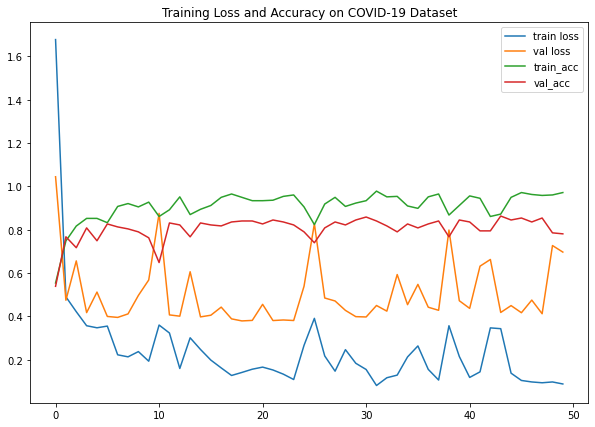

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.legend()
plt.show()
plt.savefig('lossval_loss')

### Saving the h5 file

In [ ]:
from tensorflow.keras.models import load_model

model.save('covid_chest_xray_model.h5')

### Predicting our model

In [ ]:
pred = model.predict(test_set)
pred

array([[9.8186100e-01, 1.8138947e-02],
       [4.9350843e-01, 5.0649154e-01],
       [9.9980921e-01, 1.9081734e-04],
       [9.0678841e-01, 9.3211547e-02],
       [9.9957937e-01, 4.2067567e-04],
       [8.2530469e-01, 1.7469537e-01],
       [9.9219358e-01, 7.8063579e-03],
       [9.9999738e-01, 2.6129997e-06],
       [9.9798310e-01, 2.0169117e-03],
       [9.9984121e-01, 1.5875818e-04],
       [9.9347723e-01, 6.5227593e-03],
       [4.1683774e-02, 9.5831627e-01],
       [9.9933392e-01, 6.6601892e-04],
       [9.9979669e-01, 2.0332613e-04],
       [9.9961334e-01, 3.8665955e-04],
       [9.9973267e-01, 2.6732398e-04],
       [1.7077634e-03, 9.9829227e-01],
       [9.9996781e-01, 3.2225973e-05],
       [9.9997807e-01, 2.1952925e-05],
       [3.5612693e-01, 6.4387310e-01],
       [5.3639442e-01, 4.6360561e-01],
       [8.4792520e-04, 9.9915206e-01],
       [9.9989259e-01, 1.0736020e-04],
       [9.7626865e-01, 2.3731312e-02],
       [8.7633830e-01, 1.2366174e-01],
       [5.6975299e-05, 9.

In [ ]:
import numpy as np

pred = np.argmax(pred, axis=1)
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

### Loading our model

In [ ]:
model = load_model('covid_chest_xray_model.h5')

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img('/content/drive/My Drive/covid_update/Test/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg', target_size=(224,224))

In [ ]:
x = image.img_to_array(img)
x

array([[[12., 12., 12.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [14., 14., 14.],
        [14., 14., 14.],
        [12., 12., 12.]],

       [[10., 10., 10.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [15., 15., 15.],
        [14., 14., 14.],
        [15., 15., 15.]],

       [[12., 12., 12.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [15., 15., 15.],
        [15., 15., 15.],
        [15., 15., 15.]],

       ...,

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [20., 20., 20.],
        ...,
        [11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.]],

       [[ 1.,  1.,  1.],
        [ 5.,  5.,  5.],
        [20., 20., 20.],
        ...,
        [11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.]],

       [[ 1.,  1.,  1.],
        [ 8.,  8.,  8.],
        [18., 18., 18.],
        ...,
        [11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.]]

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x = x/255

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)


array([[1.0000000e+00, 1.3076319e-25]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("The person does not have COVID-19")
else:
    print("The person has COVID-19")

The person has COVID-19
